# nibabel ( ナイバボー )

### NfTI ( Neuroimaging informatics Tcdhnology Initiative )
- *NfTI ( ニフティー )　は主に、脳のMRI画像形式に使われている*
- **医療画像の data 形式によく使用される**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
# import pathlib
from pathlib import Path
# import tqdm　/ 関数だけを呼び出す事によって tqdm を　2回記述しなくて済む
from tqdm import tqdm
import time

In [2]:
import nibabel as nib

## nib.load( )

In [3]:
## COVID DataFrame 作成
p = Path('../public-covid-data/')

df_list = []

for folder in p.iterdir():
    path_list = [p.as_posix() for p in list(folder.iterdir())]
    file_list = [os.path.split(p)[1] for p in list(folder.iterdir())]
    df_list.append(pd.DataFrame({
        'path': path_list,
        'filename': file_list
    }))

# df_list[2] と df_list[3] を merge する
df = df_list[2].merge(df_list[3], on='filename', suffixes=('_im', '_msk'))
df

,path_im,filename,path_msk
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz,../public-covid-data/rp_msk/1.nii.gz
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz,../public-covid-data/rp_msk/2.nii.gz
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz,../public-covid-data/rp_msk/3.nii.gz
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz,../public-covid-data/rp_msk/4.nii.gz
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz,../public-covid-data/rp_msk/5.nii.gz
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz,../public-covid-data/rp_msk/6.nii.gz
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz,../public-covid-data/rp_msk/7.nii.gz
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz,../public-covid-data/rp_msk/8.nii.gz
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz,../public-covid-data/rp_msk/9.nii.gz


In [4]:
path = df['path_im'].iloc[0]
path

'../public-covid-data/rp_im/1.nii.gz'

In [5]:
# 上記の　path を　nid.load( ) に入れる -> get_fdata()関数で 画像の np.array を取得
im_nifti = nib.load(path)
data = im_nifti.get_fdata()
data.shape

(630, 630, 45)

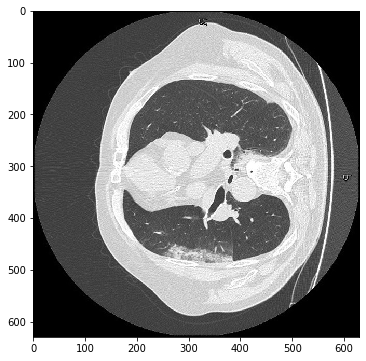

In [6]:
plt.figure(figsize=(6,6))
plt.imshow(data[:, :, 20], cmap='gray')

#### *CT の断面は足側から見た断面*
- **画像の左　:　人体の右側**
- **画像の右　:　人体の左側**


- <u>上記の dataset は画像の左側にCTの台座がきているので 90°回転させて正しい画像になる</u>

In [7]:
# 軸がおかしいので直す　: transpose
data_t = np.transpose(data)
data_t.shape

(45, 630, 630)

### transpose により　( a, b, c )　が　( c, b, a )　になる
- b　:　(height : 高さ)　は変わらない


- *今回は CT の座標で言うと　( width, height, z )　のようになっていたので*
    - **[ :, :, 20 ]　でスライスすると　( w, h ) 横軸・縦軸になり横になってしまった**
        - なので横軸と縦軸を入れ替える
        - 横軸　->　縦軸に
        - 縦軸　->　横軸に


- *Transpose　する事により ( z, h, w )　として　( z, height, width )*
    - **[ 0, :, : ]　のようにスライスして ( h, w )　とすることができた**

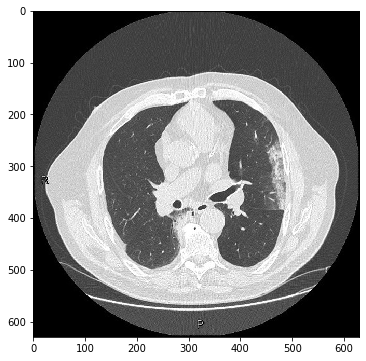

In [8]:
plt.figure(figsize=(6,6))
plt.imshow(data_t[20, :, :], cmap='gray')

## 上記を１つの関数にまとめる

In [9]:
path = df['path_im'].iloc[0]
path

'../public-covid-data/rp_im/1.nii.gz'

In [10]:
def load_nifti(path):
    im_nifti = nib.load(path)
    data = im_nifti.get_fdata()
    data = np.transpose(data)
    
    return data

In [11]:
data = load_nifti(path)

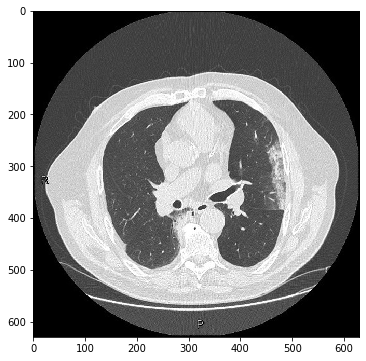

In [12]:
plt.figure(figsize=(6,6))
plt.imshow(data[20], cmap='gray')

## im　と　msk　両方を取得してくる

In [13]:
path_im = df['path_im'].iloc[0]
path_msk = df['path_msk'].iloc[0]

In [14]:
def load_nifti(path):
    im_nifti = nib.load(path)
    data = im_nifti.get_fdata()
    data = np.transpose(data)
    
    return data

In [15]:
data_im = load_nifti(path_im)
data_im.shape

(45, 630, 630)

In [16]:
data_msk = load_nifti(path_msk)
data_msk.shape

(45, 630, 630)

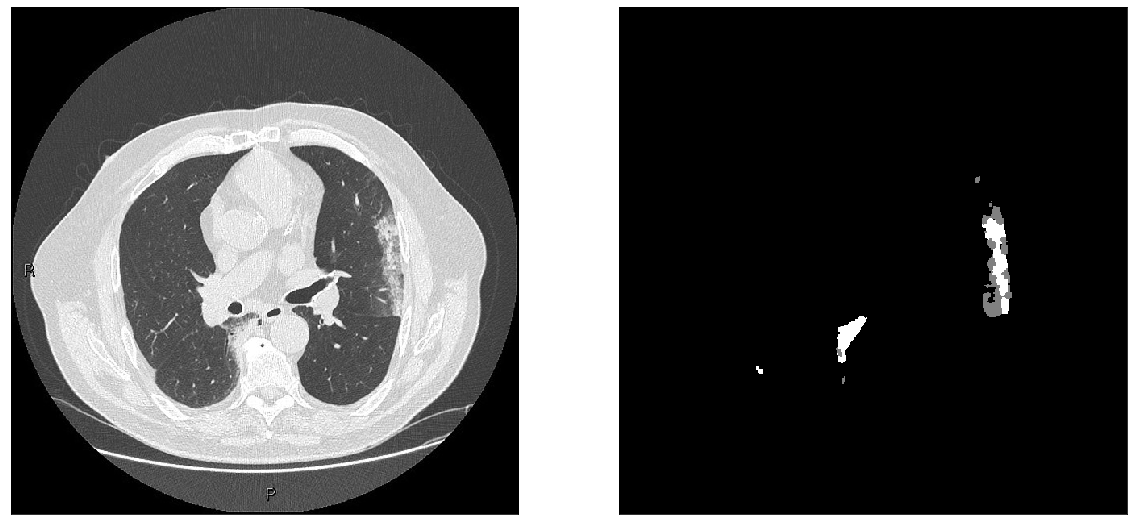

In [17]:
data = [data_im, data_msk]
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
for idx, i in enumerate(data):
    ax[idx].imshow(i[20], cmap='gray')
    ax[idx].set_xticks(ticks=[])  # 横軸のメモリを消す
    ax[idx].set_yticks(ticks=[])  # 縦軸のメモリを消す

In [18]:
np.unique(data_msk[20])

array([0., 1., 2.])

- *0　:　background*


- *1　:　ground-glass　( GGO : すりガラス影 )*


- *2　:　Consolidataion*


- *3　:　pleural effusion　( 胸水 )*

# challenge
- slice_num の columns を新規作成して merge する

In [19]:
df['slice_num'] = np.nan

In [20]:
df

,path_im,filename,path_msk,slice_num
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz,../public-covid-data/rp_msk/1.nii.gz,NaN
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz,../public-covid-data/rp_msk/2.nii.gz,NaN
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz,../public-covid-data/rp_msk/3.nii.gz,NaN
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz,../public-covid-data/rp_msk/4.nii.gz,NaN
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz,../public-covid-data/rp_msk/5.nii.gz,NaN
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz,../public-covid-data/rp_msk/6.nii.gz,NaN
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz,../public-covid-data/rp_msk/7.nii.gz,NaN
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz,../public-covid-data/rp_msk/8.nii.gz,NaN
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz,../public-covid-data/rp_msk/9.nii.gz,NaN


In [21]:
data_im.shape

(45, 630, 630)

In [22]:
# DataFrame を 回す
for idx, row in tqdm(df.iterrows(), total=len(df)):
    data = load_nifti(row['path_im'])
    slice_num = data.shape[0]
    df.loc[idx, 'slice_num'] = slice_num

100%|██████████| 9/9 [00:10<00:00,  1.13s/it]


In [23]:
df

,path_im,filename,path_msk,slice_num
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz,../public-covid-data/rp_msk/1.nii.gz,45.0
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz,../public-covid-data/rp_msk/2.nii.gz,39.0
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz,../public-covid-data/rp_msk/3.nii.gz,418.0
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz,../public-covid-data/rp_msk/4.nii.gz,39.0
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz,../public-covid-data/rp_msk/5.nii.gz,66.0
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz,../public-covid-data/rp_msk/6.nii.gz,42.0
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz,../public-covid-data/rp_msk/7.nii.gz,42.0
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz,../public-covid-data/rp_msk/8.nii.gz,45.0
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz,../public-covid-data/rp_msk/9.nii.gz,93.0


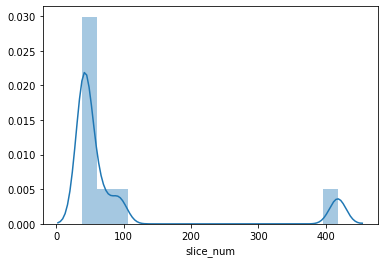

In [24]:
sns.distplot(df['slice_num'])

# multiprocessing
#### 並列処理

In [25]:
from multiprocessing import Pool, cpu_count

## map

In [26]:
def square(n):
    return n ** 2


params = [1, 2, 3, 4]
map(square, params)

- map　の戻り値は　iterator を返している

In [27]:
list(map(square, params))

[1, 4, 9, 16]

In [28]:
i = map(square, params)

In [29]:
next(i)

1

In [30]:
next(i)

4

In [31]:
next(i)

9

In [32]:
next(i)

16

In [33]:
# list 内包表記を使用するのであまり map() 関数を使用することはない
[square(p) for p in params]

[1, 4, 9, 16]

## Pool.map( )　と　Pool.imap( )
- **cpu_count( )**
    - *今使用できるCPUの物理コア数がわかる*

In [34]:
# Pool()
cpu_count()

6

In [35]:
p = Pool(processes=cpu_count()-1)

def wait_sec(sec):
    time.sleep(sec)
    return sec ** 2

In [36]:
wait_sec(2)

4

In [37]:
befor = time.time()
results = list(map(wait_sec, [1, 5, 3]))
after = time.time()
print('it took {} sec'.format(after-befor))

it took 9.022559642791748 sec


In [38]:
 results

[1, 25, 9]

- *直列で処理されている*
    - **1　が終わったら　５　->　５　が終わったら　３　->　３　が終わったら終了**


- <u>処理が１つ１つしかできない</u>

### 上記を並列処理にする
- **p.map( )　関数で、並列処理を実施**
    - *p.map( ) の戻り値は list*

In [39]:
if __name__ == "__main__":

    p = Pool(processes=cpu_count()-3)
    before = time.time()
    results = p.map(wait_sec, [1, 5, 3])
    after = time.time()
    print('it took {} sec'.format(after-before))
    
    # multiprocessを閉じる
    p.close()
    p.join()
    print(results)

it took 5.017987251281738 sec
[1, 25, 9]


- *イメージとして...*
    - **1　が　cpu　にいく時に　5 がまた別の　cpu　に　3　も同じく別の　cpu　にという形で全て別々の　cpu　で処理をする**
       - <u>並列処理される</u>


- *なので結果を見ると　5　を処理するのに　5　秒かかっている事になる*
    - 1　->　1　sec　=　1
    - 5　->　5　sec　=　25
    - 3　->　3　sec　=　9
    
    
- *p.map( )の特徴として　5　の処理が終わるまでは　1,　3　も結果は返ってこない*
    - list になって返されるので、 list　が完成するまでは結果は返ってこない
        - **全部の処理が終わったら値を返す**
    - list　の順番は元の　parameter(与えた引数の順番)　の順番になる
        - **list　は　parameter　の順番通りになる**

In [42]:
# p.imap() : iterter で返す（map関数と同じようなもの）

if __name__ == "__main__":

    p = Pool(processes=cpu_count()-3)
    before = time.time()
    for i in p.imap(wait_sec, [1, 5, 3]):
        print('{}: {} sec'.format(i, time.time() - before))
    after = time.time()
    print('it took {} sec'.format(after-before))
    
    # multiprocessを閉じる
    p.close()
    p.join()
    print(results)

1: 1.0040245056152344 sec
25: 5.009531497955322 sec
9: 5.009801864624023 sec
it took 5.009890079498291 sec
[1, 25, 9]


- *p.imap( ) は　5(=25)　の結果が出るまで 3(=9)　の結果出力を待たなければならない*
    - **順番通りに処理したい場合には良い**
    - **3(=9)　は結果は出ていて、あとは 5(=25)　の結果待ちで出力だけになっている**

In [45]:
# p.imap( ) で　 5(=25)　の結果が出るまで 3(=9)　を待たせたくない場合は p.imap_unordered() を使用する

if __name__ == "__main__":

    p = Pool(processes=cpu_count()-3)
    before = time.time()
    # 5 の処理を待ちたくない場合
    for i in p.imap_unordered(wait_sec, [1, 5, 3]):
        print('{}: {} sec'.format(i, time.time() - before))
    after = time.time()
    print('it took {} sec'.format(after-before))
    
    # multiprocessを閉じる
    p.close()
    p.join()
    print(results)


1: 1.004664421081543 sec
9: 3.00638747215271 sec
25: 5.012728214263916 sec
it took 5.013000726699829 sec
[1, 25, 9]


- *順ばんが関係ない時は p.imap_unordered( )がよい*

In [44]:
# p.imap( ) を tqdm, listにする

if __name__ == "__main__":

    p = Pool(processes=cpu_count()-3)
    before = time.time()
    results = list(tqdm(p.imap(wait_sec, [1, 5, 3]), total=3))
    after = time.time()
    print('it took {} sec'.format(after-before))
    
    # multiprocessを閉じる
    p.close()
    p.join()
    print(results)

100%|██████████| 3/3 [00:05<00:00,  1.67s/it]

it took 5.011609315872192 sec
[1, 25, 9]


- **一番最初は上記の形を完成形で覚えてしてまってOK**

## 複数の引数を取りたい場合の記述の仕方
- *map( )　処理に使う関数は引数を１つしか取れない*
    - **なので　wrap関数を作成する**


- <u>wrap関数は入れ子のようなイメージ(ラップして中のものを包み込む)</u>
    - user は外の wrap 関数にアクションすれば、中にある関数も使用ができる
        - 1つの引数を入れてあげれば、受け取った引数を　**unpacking**　して中の関数を呼んでくれる


- **( *args )　unpack operator**
    - *tuple型で取得した場合に( a, b )　->　a, b　と分けて　unpack　処理してくれる*

In [58]:
def multiply(a, b):
    return a * b


def wrap_multiply(args):
    return multiply(*args)
    

param1 = [1, 2, 3, 4]
param2 = [10, 30, 70, 20]
# [(1, 10), (2, 30), (3, 70), (4, 20)]を引数に入れて　[10, 60, 210, 80]　の結果を返したい
# zip(param1, param2) : zip（　）関数を使用
job_args = list(zip(param1, param2))


if __name__ == "__main__":

    p = Pool(processes=cpu_count()-3)
    before = time.time()
    results = list(tqdm(p.imap(wrap_multiply, job_args), total=1))
    after = time.time()
    print('it took {} sec'.format(after-before))
    
    # multiprocessを閉じるをしてあげないと pのインスタンスが動いてままになってしまう（不具合が出てしまう：特に Jupyter note book）
    p.close()
    p.join()
    print(results)


4it [00:00, 6423.13it/s]             

it took 0.00809621810913086 sec
[10, 60, 210, 80]


In [55]:
i = zip(param1, param2)
next(i)

(1, 10)

In [56]:
params = list(zip(param1, param2))
params

[(1, 10), (2, 30), (3, 70), (4, 20)]

## Python script を別のfileに保存して　Jupyter　に読み込む
- *基本的には関数などを定義するのは別の　python script　に定義して読み込む*
    - **その方が Jupyter note book もスッキリした形になって読みやすい code になる**
    - **def, class を別にする事で、色々な場所から呼び出して使用できるようになる**

In [72]:
%load_ext autoreload
%autoreload 2

from util import multiply2
# from uitl フォルダ名 import ファイル名
# import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
multiply2(1, 2)

1 x 2!!


2

#### from だけだと　script file を変更しながら作業しても関数の内容は反映されないので注意

### script file の変更を自動で反映させる為に下記を code を実行する
- <u>Jupyter note book extensions</u>


- *%load_ext autoreload*
- *%autoreload 2*
    - 数字は変更できる
        - 0　:　auto reload　を一切しない　
        - 1　:　auto reload　を今だけする
        - 2　:　auto reload　を毎回してくれる


- <u>import の前に, 一番上記, 一番最初に記述する事</u>

#### 実際の業務では　python scirpt file を作成して def, class を記述・管理していく
- Jupyter note book は def, class を呼び出して使用する